In [1]:
import math, re, os
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import model_from_json
import cv2
from matplotlib import pyplot as plt


In [2]:
json_file = open('/home/z3u5/Downloads/model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/home/z3u5/Downloads/model2.h5")
print("Loaded model from disk")

Loaded model from disk


In [4]:
def pad_frame(image,pad):
    return np.pad(image, ((pad,pad),(0,0),(0,0)), 'constant')
def interpolate_frame(image1,image3):
    img = np.concatenate((pad_frame(image1,36),pad_frame(image3,36)),axis = -1)
#     img = np.expand_dims(img, axis=0)/255.
    interpolated_image = np.zeros(pad_frame(image1,36).shape)
    img = np.stack([img for i in range(1)],axis = 0)/255.
    interpolated_image = np.stack([interpolated_image for i in range(1)],axis = 0)
    for row in range(9):
        for col in range(15):
            interpolated_image[:,row*128:row*128+128,col*128:col*128+128,:] = loaded_model.predict(img[:,row*128:row*128+128,col*128:col*128+128,:],batch_size = 16,use_multiprocessing = True)
    
    return interpolated_image

In [5]:
image1 = cv2.imread('frame1.png')
# image2 = cv2.imread('004178.jpg')
image3 = cv2.imread('frame3.png')
interpolated_image = interpolate_frame(image1,image3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


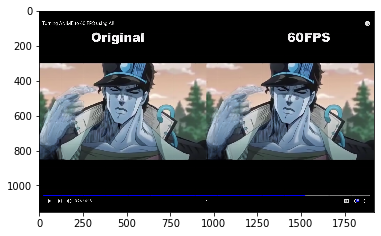

In [8]:
# plt.figure()
# plt.imshow(image2)
plt.figure()
plt.imshow(interpolated_image[0])
plt.show()

In [9]:
cv2.imwrite('interpolated_frame.jpg',interpolated_image[0]*255.)

True